In [126]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [174]:
amin = 0.1/2.5 # AU
amax = 12/2.5 # AU
Mmin = 1/95 # Mearth
Mmax = 13*318/95 # Mearth
A = 0.21
alpha = -0.86
beta = 1.1
Msat = 1 # Mearth

In [175]:
Ngridx=40
Ngridy=80
loga = np.linspace(np.log10(amin), np.log10(amax), Ngridx)
logm = np.linspace(np.log10(Mmin), np.log10(Mmax), Ngridy)
dloga = (loga[1]-loga[0])
dlogm = (logm[1]-logm[0])

In [176]:
x,y = np.meshgrid(loga, logm, indexing='ij')
z = A*(10**x)**beta*(10**y)**alpha

In [180]:
10**logm

array([1.05263158e-02, 1.16964276e-02, 1.29966097e-02, 1.44413209e-02,
       1.60466271e-02, 1.78303801e-02, 1.98124162e-02, 2.20147767e-02,
       2.44619529e-02, 2.71811588e-02, 3.02026332e-02, 3.35599767e-02,
       3.72905245e-02, 4.14357623e-02, 4.60417873e-02, 5.11598210e-02,
       5.68467784e-02, 6.31659015e-02, 7.01874623e-02, 7.79895441e-02,
       8.66589102e-02, 9.62919684e-02, 1.06995843e-01, 1.18889568e-01,
       1.32105406e-01, 1.46790324e-01, 1.63107628e-01, 1.81238773e-01,
       2.01385387e-01, 2.23771512e-01, 2.48646092e-01, 2.76285745e-01,
       3.06997840e-01, 3.41123911e-01, 3.79043456e-01, 4.21178161e-01,
       4.67996587e-01, 5.20019378e-01, 5.77825054e-01, 6.42056446e-01,
       7.13427838e-01, 7.92732919e-01, 8.80853602e-01, 9.78769834e-01,
       1.08757050e+00, 1.20846551e+00, 1.34279928e+00, 1.49206568e+00,
       1.65792463e+00, 1.84222056e+00, 2.04700294e+00, 2.27454905e+00,
       2.52738934e+00, 2.80833550e+00, 3.12051182e+00, 3.46738984e+00,
      

In [177]:
dloga*dlogm

0.0024404705176073946

In [178]:
z.sum()*dloga*dlogm

13.13288885231836

In [130]:
x.shape

(40, 80)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


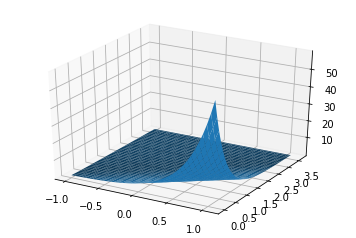

In [131]:
ax = plt.subplot(projection='3d')
ax.plot_surface(X=x, Y=y, Z=z)

In [132]:
cumpdf = np.cumsum(z.reshape((Ngridx*Ngridy)))/z.sum()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


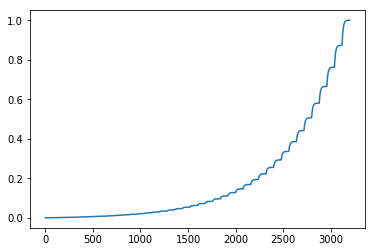

In [133]:
fig, ax = plt.subplots()
ax.plot(range(Ngridx*Ngridy), cumpdf)

In [134]:
def sample(x, y, z, nvals):
    Nx = z.shape[0]
    Ny = z.shape[1]
    cumpdf = np.cumsum(z.reshape((Nx*Ny)))/z.sum()
    x1d = x.reshape(Nx*Ny)
    y1d = y.reshape(Nx*Ny)
    randv = np.random.uniform(size=nvals)
    idxs = np.searchsorted(cumpdf, randv)
    return x1d[idxs], y1d[idxs]

In [135]:
%%time
xsamp, ysamp = sample(x, y, z, 10000)

CPU times: user 1.57 ms, sys: 676 µs, total: 2.25 ms
Wall time: 1.26 ms


In [140]:
hist, xedges, yedges = np.histogram2d(xsamp, ysamp, bins=(Ngridx, Ngridy))

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


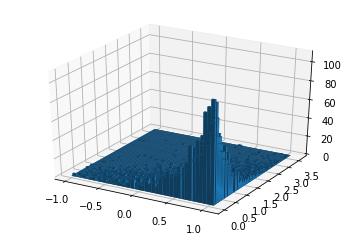

In [141]:
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing='ij')

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(Ngridx*Ngridy)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
fig3D = plt.figure()
ax3D = fig3D.add_subplot(111, projection='3d')
ax3D.bar3d(xpos, ypos, zpos, dx, dy, dz=dz)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


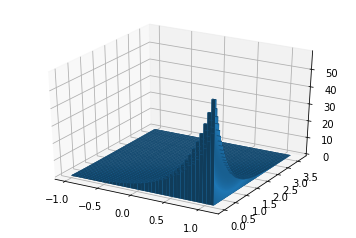

In [142]:
xpos = x.flatten()
ypos = y.flatten()
zpos = np.zeros(Ngridx*Ngridy)
dx = (loga[-1]-loga[0])/Ngridx
dy = (logm[-1]-logm[0])/Ngridy
dz = z.flatten()
fig3D = plt.figure()
ax3D = fig3D.add_subplot(111, projection='3d')
ax3D.bar3d(xpos, ypos, zpos, dx, dy, dz=dz)